# How to Create Theta Frequency Network Oscillation

 ## Step 1. Create 20 eIAF Neurons

In [1]:
from neuron import h, gui

In [2]:
# the number of cells
nCell = 20

cells = []

for _ in range(0, nCell):
    # to assign IntFire1() to IAF
    iaf = h.IntFire1()
    iaf.refrac = 5
    cells.append(iaf)

In [3]:
# stimulation for each IAF neuron
stims = []

# stimulation -> neuron connectivity
ncs = []

for i in range(0, nCell):
    # to assign NetStim() to EX
    ex = h.NetStim()
    
    # the time input comes (starts)
    ex.start = 50
    
    # the time between each input
    ex.interval = 5
    
    # the number of inputs
    ex. number = 500
    
    # the level of noise (from 0 to 1)
    ex.noise = 1
    
    stims.append(ex)
    
    # source, target, threshold, delay, weight
    # to connect the source to the target
    nc = h.NetCon(ex, cells[i], 1, 0, 0.5)
    
    ncs.append(nc)

## Step 2. Generating Inhibitory Inputs and Its Connection

In [4]:
# inhibitory connectivity
inh = h.NetStim()
inh.start = 500
inh.interval = 300
inh.number = 5
inh.noise = 0

inh_ncs = []

for i in range(0, nCell):
    inh_ncs.append(h.NetCon(inh, cells[i], 1, 0, -0.5))

## Step 3. Record and plot the spike timings of each spike

In [5]:
# simulation time
h.tstop = 3000

# dummy section for NEURON scripting
soma = h.Section()

# time
tvec = h.Vector().record(h._ref_t)

In [6]:
# spike time recordings
spkts = []

for i in range(0, nCell):
    spkts.append(h.Vector())
    h.NetCon(cells[i], None).record(spkts[-1])

In [7]:
h.init()
h.run()

0.0

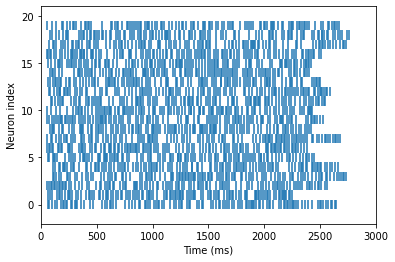

In [8]:
import matplotlib.pyplot as plt

plt.figure()
plt.eventplot(spkts)
plt.xlim(tvec.min(), tvec.max())

plt.xlabel('Time (ms)')
plt.ylabel('Neuron index')

plt.show()